In [67]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# ДЗ №7 по теме перестройки в геноме

В этом задании предстоит разобраться, на сколько хорошо и в каких пределах, жадный алгоритм подсчета перестановок будет возвращать похожее количество перестановок на то, что было в действительности.

### Симуляция (2 балла)
Будем работать в рамках Random Breakage Model - то есть считать, что разрывы могут происходить в любом месте последовательности. В примере будем пользоваться обозначением синтенных блоков числами, а их ориентацию будем обозначать знаком (+ или -).  
Симуляция заключается в следующем:  
Нужно взять последовательность чисел от 1 до 1000, после чего проделать в этой последовательности k разворотов (разворот, включает в себя смену знаков). Какие стоит выбирать k, станет понятно в последнем задании.

### Жадный алгоритм сортировки поворотами (2 балла)
Напишите жадный алгоритм сортировки разворотами (см. лекцию), который в качестве ответа возвращает количество операций разворота, которые понадобилось сделать.

In [71]:
class Sequence:
    def __init__(self, n: int, k: int) -> None:
        self.n = n
        self.k = k
        self.blocks = np.arange(1, n+1, 1)
        for _ in range(self.k):
            a, b = np.random.choice(range(self.n), 2, replace=False)
            self.rev_segment(a, b)

    def rev_segment(self, a, b):
        if a > b:
            a, b = b, a
        self.blocks[a:b] = - np.flip(self.blocks[a:b])

    def gready_sort(self):
        iters = 0
        for i in range(self.n):
            if self.blocks[i] == i + 1:
                continue
            for j in range(i, self.n):
                if abs(self.blocks[j]) == i + 1:
                    self.rev_segment(i, j+1)
                    iters += 1
                    break
            if self.blocks[i] == - (i + 1):
                self.rev_segment(i, i+1)
                iters += 1
        return iters

seq = Sequence(100, 10)
seq.gready_sort()

61

### Анализ расстояния (4 балла)
Постройте график зависимости расстояния которое возвращает жадный алгоритм от реального расстояния.  Проанализируйте, что происходит при небольшом количестве поворотов и когда поворотов сделано очень много.  
Определите, при каком количестве поворотов все ломается, например, ответ отличается > чем на 25, причем жадный алгоритм возвращает меньше операций, чем происходит в симмуляции. Чтобы точнее найти количество разворотов, при котором это происходит, повторите симуляцию много раз и постройте распределение этой величины деленной на длину изначальной последовательности (1000).  
Постарайтесь объяснить, что происходит.

In [72]:
n = 1000
count = 10
ks = np.arange(1, 3*n, 20)
total_rev = np.zeros_like(ks)

for i, k in tqdm(enumerate(ks), total=len(ks)):
    tmp = []
    for _ in range(count):
        seq = Sequence(n, k)
        iters = seq.gready_sort()
        tmp.append(iters)
    total_rev[i] = np.mean(tmp)

100%|██████████| 150/150 [06:32<00:00,  2.62s/it]


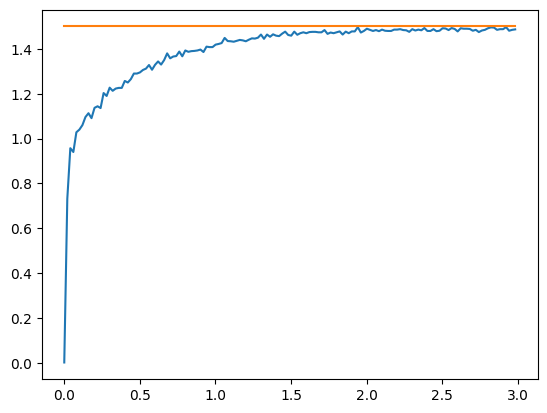

In [76]:
plt.plot(ks/n, total_rev/n)
plt.plot(ks/n, 1.5*np.ones_like(ks))

При большом k последовательность блоков выглядит случайно и их ориентаций. 

На каждом шаге алгоритма мы ставим на место 1 блок и (очень редко 2 блока поэтому будем считать, что 1). И с вероятностью 0.5 он будет со знаком + сразу и не нужно будет менять ориентацию этого блока. 

Получается для случайной последовательности блоков жадному алгоритму нужно 1.5 шагов в среднем, чтобы поставить 1 блок на место. Это мы и видим на графике. При k больше n послед. блоков и их ориентаций выглядит случайно